In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import sklearn
import json
import math
import datetime
import warnings
from sklearn.model_selection import train_test_split


In [2]:
warnings.filterwarnings("ignore", category=FutureWarning)

### Load Data

In [3]:
df = pd.read_csv("Toot_Poo_Pee_2.csv")

### Explore the data

In [4]:
df.shape

(1238, 9)

In [5]:
df.head()

,Month,Time,Directional Degree,Direction,Poo/pee,Weather,Temp in F,Wind Direction,Wind Speed
0,Oct,Midnight,337,N,Pee,Cloudy,67,NW,3.0
1,Dec,Midnight,279,W,Pee,Clear Night,41,S,3.0
2,Oct,Midnight,248,W,Pee,Clear Night,68,S,5.0
3,Nov,Midnight,272,W,Pee,Night with Clouds,36,NE,3.0
4,Dec,Midnight,313,NW,Pee,Night with Clouds,62,SE,24.0


In [6]:
df.describe()

,Directional Degree,Temp in F,Wind Speed
count,1238.000000,1238.000000,1238.000000
mean,202.976575,52.996769,8.480372
std,100.755193,14.955444,5.245687
min,0.000000,17.000000,0.000000
25%,125.000000,42.000000,5.000000
50%,227.000000,53.000000,8.000000
75%,286.000000,64.000000,12.000000
max,368.000000,95.000000,33.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238 entries, 0 to 1237
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Month               1238 non-null   object 
 1   Time                1238 non-null   object 
 2   Directional Degree  1238 non-null   int64  
 3   Direction           1238 non-null   object 
 4   Poo/pee             1238 non-null   object 
 5   Weather             1238 non-null   object 
 6   Temp in F           1238 non-null   int64  
 7   Wind Direction      1238 non-null   object 
 8   Wind Speed          1238 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 87.2+ KB


Feature explanation:<br>
'Month' = Originally, full dates of recording. These dates were bucketed into months.<br>
'Time' = Originally, time of day of the recording. These times were bucketed into 'Midnight,' 'Morning,' 'Afternoon,' 'Night.'<br>
'Directional Degree' = 360 degree compass direction Tooter pooped/peed.<br>
'Direction' = Written direction Tooter pooped/peed.<br>
'Poo/pee' = Whether Tooter pooped or peed.<br>
'Weather' = Description of the weatherat the time of recording.<br>
'Temp in F' = Temperature in Farenheit at the time of recording.<br>
'Wind Direction' = Direction of the wind at the time of recording.<br>
'Wind Speed' = Wind speed at the time of recording.

Define the unique values per column.

In [8]:
print(df.nunique())

Month                  10
Time                    4
Directional Degree    351
Direction               8
Poo/pee                 2
Weather                10
Temp in F              76
Wind Direction         18
Wind Speed             24
dtype: int64


In [9]:
df['Direction'].describe()

count     1238
unique       8
top          W
freq       224
Name: Direction, dtype: object

In [10]:
df['Direction'].value_counts()

W     224
NW    214
SW    198
SE    161
NE    147
N     128
S     104
E      62
Name: Direction, dtype: int64

In [11]:
df['Wind Direction'].value_counts()

N        218
SSE      119
still    118
S        110
NNE       93
SE        83
SW        83
SSW       75
ESE       57
WSW       53
NE        52
E         42
W         36
NNW       30
ENE       27
NW        24
WNW       17
NWN        1
Name: Wind Direction, dtype: int64

[Text(0, 0, 'N'),
 Text(1, 0, 'W'),
 Text(2, 0, 'NW'),
 Text(3, 0, 'SW'),
 Text(4, 0, 'NE'),
 Text(5, 0, 'SE'),
 Text(6, 0, 'S'),
 Text(7, 0, 'E')]

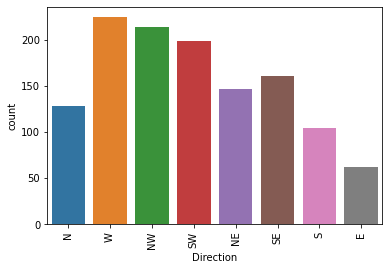

In [12]:
countplot = sns.countplot(x=df["Direction"])
countplot.set_xticklabels(countplot.get_xticklabels(),rotation=90)

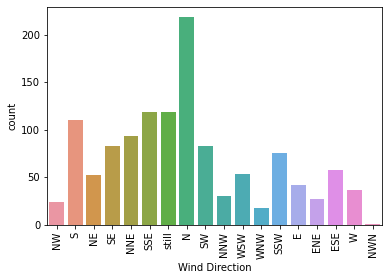

In [13]:
countplot = sns.countplot(x=df["Wind Direction"])
dd = countplot.set_xticklabels(countplot.get_xticklabels(),rotation=90)

### Convert categorical columns into numerical dtypes

In [14]:
categorical_columns = [
    'Month','Time','Poo/pee', 'Weather', 'Wind Direction']
for column in categorical_columns:
    tempdf = pd.get_dummies(df[column], prefix=column)
    df = pd.merge(
        left=df,
        right=tempdf,
        left_index=True,
        right_index=True,
    )
    df = df.drop(columns=column)
df.head()

,Directional Degree,Direction,Temp in F,Wind Speed,Month_Apr,Month_Dec,Month_Feb,Month_Jan,Month_Jun,Month_Mar,...,Wind Direction_NWN,Wind Direction_S,Wind Direction_SE,Wind Direction_SSE,Wind Direction_SSW,Wind Direction_SW,Wind Direction_W,Wind Direction_WNW,Wind Direction_WSW,Wind Direction_still
0,337,N,67,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,279,W,41,3.0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,248,W,68,5.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,272,W,36,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,313,NW,62,24.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### Convert target feature with integer encoder

In [15]:
# Create integer coded 'Direction' feature
df['Dir_codes'] = df['Direction'].astype('category')

# This code integer encodes each unique string in 'Directions'
df['Dir_ints'] = df['Dir_codes'].cat.codes

# Drop 'Direction' feature
df = df.drop(labels='Direction', axis=1)

df.head()

,Directional Degree,Temp in F,Wind Speed,Month_Apr,Month_Dec,Month_Feb,Month_Jan,Month_Jun,Month_Mar,Month_May,...,Wind Direction_SE,Wind Direction_SSE,Wind Direction_SSW,Wind Direction_SW,Wind Direction_W,Wind Direction_WNW,Wind Direction_WSW,Wind Direction_still,Dir_codes,Dir_ints
0,337,67,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,N,1
1,279,41,3.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,W,7
2,248,68,5.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,W,7
3,272,36,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,W,7
4,313,62,24.0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,NW,3


Create an index to map the new target integer codes

In [16]:
# create a mapping index for reference
mapping_index = df[['Dir_codes', 'Dir_ints']]


In [17]:
# Map the new codes to the 'Direction'
# Now we know what integers are the "Direction" string values
mapping_index.value_counts()

Dir_codes  Dir_ints
W          7           224
NW         3           214
SW         6           198
SE         5           161
NE         2           147
N          1           128
S          4           104
E          0            62
dtype: int64

Now drop 'Dir_codes' features

In [18]:
# drop Dir_codes, no longer needed
df = df.drop(labels='Dir_codes', axis=1)
df.head()

,Directional Degree,Temp in F,Wind Speed,Month_Apr,Month_Dec,Month_Feb,Month_Jan,Month_Jun,Month_Mar,Month_May,...,Wind Direction_S,Wind Direction_SE,Wind Direction_SSE,Wind Direction_SSW,Wind Direction_SW,Wind Direction_W,Wind Direction_WNW,Wind Direction_WSW,Wind Direction_still,Dir_ints
0,337,67,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,279,41,3.0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,7
2,248,68,5.0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,7
3,272,36,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
4,313,62,24.0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,3


Confirmed that all features are now numerical

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238 entries, 0 to 1237
Data columns (total 48 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Directional Degree         1238 non-null   int64  
 1   Temp in F                  1238 non-null   int64  
 2   Wind Speed                 1238 non-null   float64
 3   Month_Apr                  1238 non-null   uint8  
 4   Month_Dec                  1238 non-null   uint8  
 5   Month_Feb                  1238 non-null   uint8  
 6   Month_Jan                  1238 non-null   uint8  
 7   Month_Jun                  1238 non-null   uint8  
 8   Month_Mar                  1238 non-null   uint8  
 9   Month_May                  1238 non-null   uint8  
 10  Month_Nov                  1238 non-null   uint8  
 11  Month_Oct                  1238 non-null   uint8  
 12  Month_Sept                 1238 non-null   uint8  
 13  Time_Afternoon             1238 non-null   uint8

In [20]:
small_sample = df.sample(n=100)

In [20]:
sns.pairplot(small_sample)

Does not seem to have any correlations

### Focus more on target feature
Dir_codes_ints

W=          7                 
NW=         3                 
SW=        6                  
N=          1                  
NE=         2                  
SE=         5                  
S=          4                  
E=          0

<AxesSubplot:xlabel='Dir_ints', ylabel='Count'>

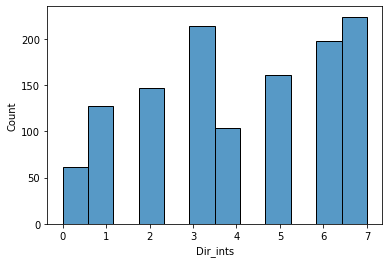

In [21]:
target = df["Dir_ints"]
sns.histplot(target)

Does not seem to have a normal distribution

<AxesSubplot:>

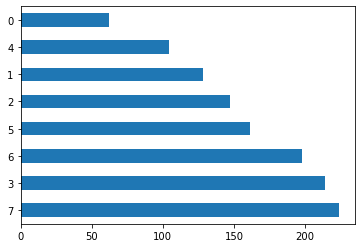

In [22]:
target.value_counts().plot(kind='barh')

<AxesSubplot:ylabel='Density'>

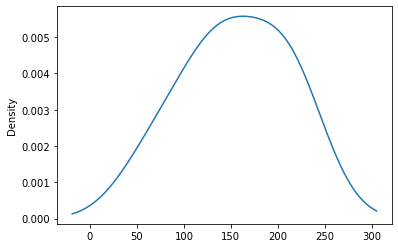

In [23]:
target.value_counts().plot(kind='kde')
# estimates kernal density function or where frequencies are most frequent

## Part II

Run a test train split

In [24]:
X = df.drop("Dir_ints",axis=1)
Y = df["Dir_ints"]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

Take a look at the splits

In [26]:
X["Wind Speed"].value_counts().head()

6.0    131
8.0    127
7.0    120
0.0    118
3.0    111
Name: Wind Speed, dtype: int64

In [27]:
X_train["Wind Speed"].value_counts().head()

6.0    102
8.0     95
0.0     93
7.0     89
3.0     79
Name: Wind Speed, dtype: int64

In [28]:
X_test["Wind Speed"].value_counts().head()

8.0    32
3.0    32
7.0    31
6.0    29
5.0    29
Name: Wind Speed, dtype: int64

### Try different models

DecisionTreeClassifier

In [29]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVR
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

In [30]:
gini_tree = DecisionTreeClassifier(criterion = "gini", random_state=42).fit(X=X_train, y=y_train)

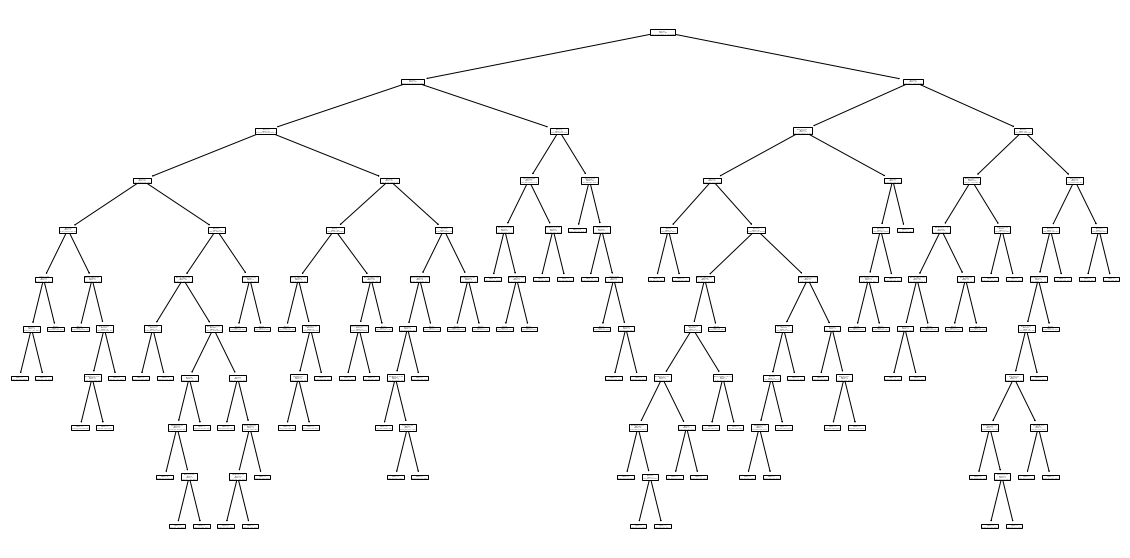

In [31]:
plt.figure(figsize=(20,10))
_ = plot_tree(gini_tree, feature_names=X_train.columns)

This is obviously high because it's scored to itself

In [31]:
Y_test_predicted = gini_tree.predict(X_test)
accuracy_score(y_test, Y_test_predicted)

0.8935483870967742

89% is not bad!

In [32]:
entropy_tree = DecisionTreeClassifier(criterion = "entropy", random_state=42).fit(X=X_train, y=y_train)

In [33]:
Y_test_predicted = entropy_tree.predict(X_test)
accuracy_score(y_test, Y_test_predicted)

0.9032258064516129

Slightly better at 90%

Let's try with a RandomForestClassifer

In [34]:
#start with a default 'gini' model
rf_gini = RandomForestClassifier(n_estimators=50, random_state=42).fit(X=X_train, y=y_train)

In [35]:
Y_test_predicted = rf_gini.predict(X_test)
accuracy_score(y_test, Y_test_predicted)

0.7322580645161291

In [36]:
rf_entropy = RandomForestClassifier(criterion = 'entropy', n_estimators=50, random_state=42).fit(X=X_train, y=y_train)

In [37]:
Y_test_predicted = rf_gini.predict(X_test)
accuracy_score(y_test, Y_test_predicted)

0.7322580645161291

Let's give Neural Networks a try

In [38]:
mlp = MLPClassifier(random_state=42, max_iter=500).fit(X_train, y_train)

In [39]:
Y_test_predicted = mlp.predict(X_test)
accuracy_score(y_test, Y_test_predicted)

0.5935483870967742

Looks like we are, very much, overfitting, let's go back to simpler times with a KNN.

In [40]:
neigh = KNeighborsClassifier(n_neighbors=10).fit(X_train, y_train)

In [41]:
Y_test_predicted = neigh.predict(X_test)
accuracy_score(y_test, Y_test_predicted)

0.8935483870967742

In all honestly, this is suspiciously accurate and upon review of the features, 'Directional Degree' seems too closely related to the target feature. So let's remove it and train test split again

In [42]:
# Also drop 'Directional Degree' as it's too interdependent on target feature
df = df.drop(labels='Directional Degree', axis=1)

In [43]:
X = df.drop("Dir_ints",axis=1)
Y = df["Dir_ints"]

In [44]:
# split train and test again
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

In [45]:
gini_tree = DecisionTreeClassifier(criterion = "gini", random_state=42).fit(X=X_train, y=y_train)
Y_test_predicted = gini_tree.predict(X_test)

In [46]:
accuracy_score(y_test, Y_test_predicted)

0.23225806451612904

Not so great accuracy here.

In [47]:
entropy_tree = DecisionTreeClassifier(criterion = "entropy", random_state=42).fit(X=X_train, y=y_train)

In [48]:
Y_test_predicted = entropy_tree.predict(X_test)
accuracy_score(y_test, Y_test_predicted)

0.2129032258064516

Entropy tree is not any better

In [49]:
rf_gini = RandomForestClassifier(n_estimators=50, random_state=42).fit(X=X_train, y=y_train)

In [50]:
Y_test_predicted = rf_gini.predict(X_test)
accuracy_score(y_test, Y_test_predicted)

0.23225806451612904

Slightly better results with Random Forest.
Let's Try MLP Classifier

In [51]:
mlp = MLPClassifier(random_state=42, max_iter=500).fit(X_train, y_train)

In [52]:
Y_test_predicted = mlp.predict(X_test)
accuracy_score(y_test, Y_test_predicted)

0.24193548387096775

Even better accuracy by a little bit. Let's go ahead and try KNN Classifier.

In [53]:
neigh = KNeighborsClassifier(n_neighbors=10).fit(X_train, y_train)
Y_test_predicted = neigh.predict(X_test)
accuracy_score(y_test, Y_test_predicted)

0.18387096774193548

### Hyperparameter Tuning

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
def dt_best_hyperparameters(X_train, y_train):
    """
    Input: The training X features and Y labels/values
    Output: The classifier with the best hyperparams, the predictions
    """
    gini_tree = DecisionTreeClassifier()
    param_grid = {"criterion": ['gini','entropy'],
                  "ccp_alpha": [0.5,1.0,2.0,0.0]}
    
    # Warning, takes a while!
    search = GridSearchCV(gini_tree, param_grid)
    search.fit(X_train,y_train)
    return search, search.predict(X_test)

In [56]:
best, predicts = dt_best_hyperparameters(X_train, y_train)

In [57]:
best.best_params_

{'ccp_alpha': 0.0, 'criterion': 'entropy'}

In [58]:
best.best_score_

0.20580645161290323

In [59]:
def rf_best_hyperparameters(X_train, y_train):
    """
    Input: The training X features and Y labels/values
    Output: The classifier with the best hyperparams, the predictions
    """
    rf_gini = RandomForestClassifier()
    param_grid = {"n_estimators": [5000, 2000, 1000, 500],
                  'criterion':['gini','entropy'],
                  'ccp_alpha':[0.0,0.1,0.5,1.0,2.0]}
    
    # Warning, takes a while!
    search = GridSearchCV(rf_gini, param_grid)
    search.fit(X_train,y_train)
    return search, search.predict(X_test)

In [ ]:
best, predicts = rf_best_hyperparameters(X_train, y_train)

In [ ]:
best.best_params_

In [ ]:
best.best_score_

In [ ]:
def mlp_best_hyperparameters(X_train, y_train):
    """
    Input: The training X features and Y labels/values
    Output: The classifier with the best hyperparams, the predictions
    """
    mlp = MLPClassifier()
    param_grid = {"max_iter": [15000, 10000, 5000]}
    
    # Warning, takes a while!
    search = GridSearchCV(mlp, param_grid)
    search.fit(X_train,y_train)
    return search, search.predict(X_test)

In [ ]:
best, predicts = mlp_best_hyperparameters(X_train, y_train)

In [ ]:
best.best_params_

In [65]:
best.best_score_

0.22627143272304565

### Part III

In [59]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import textwrap

In [60]:
def evaluate_regression(model,x_test_ev,y_test_ev):
    """
    Evaluates regression using MAE,MSE, and R^2
    """
    predictions = model.predict(x_test_ev)
    mae = mean_absolute_error(y_test_ev,predictions)
    mse = mean_squared_error(y_test_ev,predictions)
    r2 = r2_score(y_test_ev,predictions)
    return {"mae":mae,"mse":mse,"r2":r2}

In [61]:
"""
Trains and evaluates a single model on a random train/test split
"""
def evaluate_random(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    
    evals = evaluate_regression(model,X_test,y_test)
    
    return evals

In [62]:
def get_scores(X,y,models,n_trials=5):
    
    """
    Input:
    X: Your features
    y: Your target
    models: A list of the models that you are evaluating
    n_trials (opt): The number of random trials
    
    Output:
    A dataframe with three colums and len(models)*n_trials*(number of evaluation metrics) rows.
    Each row represents a single random evaluation.
    
    Model: The name of the model being evaluated
    Evaluation: The name of the evaluation (e.g. acc, precision, MSE)
    Score: The score of the evaluation
    """
    data = {
        "model": [],
        "evaluation": [],
        "score": [],
    }
    
    for n in range(n_trials):
        for model in models:
            X_train,X_test,y_train,y_test = train_test_split(X,y)
            
            scaler = MinMaxScaler()
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)
            
            scores = evaluate_random(model,X_train,y_train,X_test,y_test)
            
            for key in scores:
                data["model"].append(str(model))
                data["evaluation"].append(key)
                data["score"].append(scores[key])
    
    return pd.DataFrame.from_dict(data)

In [63]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [64]:
gini_tree = DecisionTreeClassifier(ccp_alpha= 0.0, criterion= 'gini').fit(X_train,y_train)
evaluate_regression(gini_tree,X_test,y_test)

{'mae': 2.367741935483871, 'mse': 9.470967741935484, 'r2': -0.9340046620442874}

In [65]:
rf= RandomForestClassifier(ccp_alpha= 0.0, criterion= 'entropy', n_estimators= 1000).fit(X_train,y_train)
evaluate_regression(rf,X_test,y_test)

{'mae': 2.2870967741935484,
 'mse': 8.977419354838709,
 'r2': -0.8332203591516525}

In [66]:
mlp = MLPClassifier(random_state=42, max_iter=5000).fit(X_train, y_train)
evaluate_regression(mlp,X_test,y_test)

{'mae': 2.3161290322580643, 'mse': 9.30967741935484, 'r2': -0.901068615347348}

In [67]:
scores = get_scores(X,Y,[gini_tree,rf,mlp],n_trials=5)

In [68]:
scores.head()

,model,evaluation,score
0,DecisionTreeClassifier(),mae,2.267742
1,DecisionTreeClassifier(),mse,8.693548
2,DecisionTreeClassifier(),r2,-0.811957
3,"RandomForestClassifier(criterion='entropy', n_...",mae,2.248387
4,"RandomForestClassifier(criterion='entropy', n_...",mse,8.861290


[Text(0, 0, 'DecisionTr\neeClassifi\ner()'),
 Text(1, 0, "RandomFore\nstClassifi\ner(criteri\non='entrop\ny', n_esti\nmators=100\n0)"),
 Text(2, 0, 'MLPClassif\nier(max_it\ner=5000, r\nandom_stat\ne=42)')]

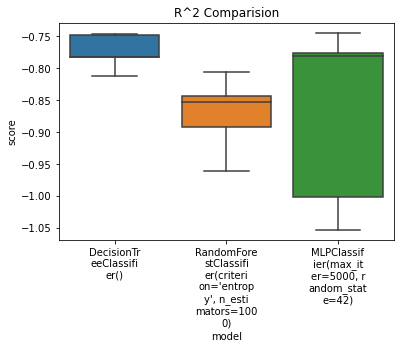

In [69]:
ax = sns.boxplot(x="model",y="score",data=scores[scores["evaluation"]=="r2"])
ax.set_title("R^2 Comparision")
ax.set_xticklabels([textwrap.fill(t.get_text(), 10)  for t in ax.get_xticklabels()])

[Text(0, 0, 'DecisionTr\neeClassifi\ner()'),
 Text(1, 0, "RandomFore\nstClassifi\ner(criteri\non='entrop\ny', n_esti\nmators=100\n0)"),
 Text(2, 0, 'MLPClassif\nier(max_it\ner=5000, r\nandom_stat\ne=42)')]

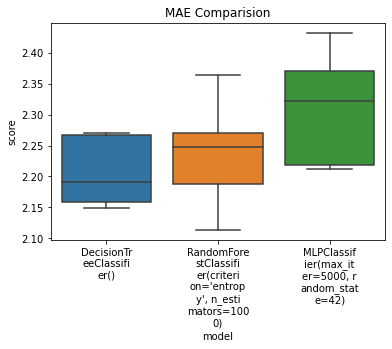

In [70]:
ax1 = sns.boxplot(x="model",y="score",data=scores[scores["evaluation"]=="mae"])
ax1.set_title("MAE Comparision")
ax1.set_xticklabels([textwrap.fill(t.get_text(), 10)  for t in ax.get_xticklabels()])

[Text(0, 0, 'DecisionTr\neeClassifi\ner()'),
 Text(1, 0, "RandomFore\nstClassifi\ner(criteri\non='entrop\ny', n_esti\nmators=100\n0)"),
 Text(2, 0, 'MLPClassif\nier(max_it\ner=5000, r\nandom_stat\ne=42)')]

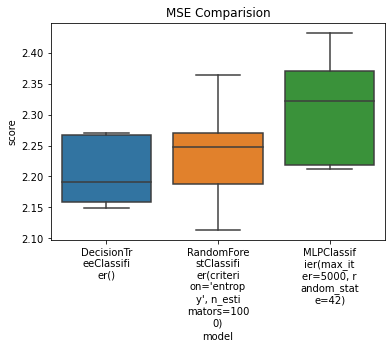

In [71]:
ax2 = sns.boxplot(x="model",y="score",data=scores[scores["evaluation"]=="mae"])
ax2.set_title("MSE Comparision")
ax2.set_xticklabels([textwrap.fill(t.get_text(), 10)  for t in ax.get_xticklabels()])